In [185]:
pip install pandas # type: ignore

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'

[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [186]:
pip install matplotlib #type: ignore

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#type:'

[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [187]:
import pandas as pd
file_path = file_path = "C:\\Users\\muham\\Downloads\\2d+elastodynamic+metamaterials\\data.csv"
data = pd.read_csv(file_path)

In [188]:

# Separate features and target variables
X = data.drop(columns=['BandGapWidth'])
y = data['BandGapWidth']

In [189]:
print(data)

       CondensedBinary2DGeometry  BandGapLocation  BandGapWidth
0                   1.000000e+01       497.011658     22.697266
1                   1.100000e+01       467.929018     85.654936
2                   1.000000e+02       687.636705     37.409815
3                   1.010000e+02       721.282777     61.604756
4                   1.100000e+02       464.347767     46.354707
...                          ...              ...           ...
20515               1.111110e+14      2449.677898     99.885272
20516               1.111110e+14      2383.633711    152.198985
20517               1.111110e+14      2506.192775     30.706430
20518               1.111110e+14      2338.518533     11.138247
20519               1.111110e+14      3164.180660     10.860201

[20520 rows x 3 columns]


In [190]:
print(X)

       CondensedBinary2DGeometry  BandGapLocation
0                   1.000000e+01       497.011658
1                   1.100000e+01       467.929018
2                   1.000000e+02       687.636705
3                   1.010000e+02       721.282777
4                   1.100000e+02       464.347767
...                          ...              ...
20515               1.111110e+14      2449.677898
20516               1.111110e+14      2383.633711
20517               1.111110e+14      2506.192775
20518               1.111110e+14      2338.518533
20519               1.111110e+14      3164.180660

[20520 rows x 2 columns]


In [191]:
print(y)

0         22.697266
1         85.654936
2         37.409815
3         61.604756
4         46.354707
            ...    
20515     99.885272
20516    152.198985
20517     30.706430
20518     11.138247
20519     10.860201
Name: BandGapWidth, Length: 20520, dtype: float64


In [192]:
X.describe()

,CondensedBinary2DGeometry,BandGapLocation
count,2.052000e+04,20520.000000
mean,5.656323e+13,1136.258706
std,5.053400e+13,467.219269
min,1.000000e+01,404.513796
25%,1.000010e+13,752.728487
50%,1.000000e+14,1055.554504
75%,1.100100e+14,1417.049418
max,1.111110e+14,3367.431334


In [193]:
X.head()

,CondensedBinary2DGeometry,BandGapLocation
0,10.0,497.011658
1,11.0,467.929018
2,100.0,687.636705
3,101.0,721.282777
4,110.0,464.347767


In [194]:
y.describe()

count    20520.000000
mean       134.951806
std        176.020449
min         10.000976
25%         23.888513
50%         68.994360
75%        164.771714
max       1533.493231
Name: BandGapWidth, dtype: float64

In [195]:
y.head()

0    22.697266
1    85.654936
2    37.409815
3    61.604756
4    46.354707
Name: BandGapWidth, dtype: float64

In [196]:
data.head()

,CondensedBinary2DGeometry,BandGapLocation,BandGapWidth
0,10.0,497.011658,22.697266
1,11.0,467.929018,85.654936
2,100.0,687.636705,37.409815
3,101.0,721.282777,61.604756
4,110.0,464.347767,46.354707


In [197]:
def preprocess_data(data):
    # Mengisi nilai yang hilang dengan rata-rata kolom
    data = data.fillna(data.mean())

    # Normalisasi data
    data = (data - data.min()) / (data.max() - data.min())
    
    return data

data = preprocess_data(data)

In [198]:
print("Data setelah preprocessing:")
data.head()

Data setelah preprocessing:


,CondensedBinary2DGeometry,BandGapLocation,BandGapWidth
0,0.000000e+00,0.031219,0.008334
1,9.000009e-15,0.021403,0.049658
2,8.100008e-13,0.095555,0.017991
3,8.190008e-13,0.106911,0.033872
4,9.000009e-13,0.020194,0.023862


<Axes: >

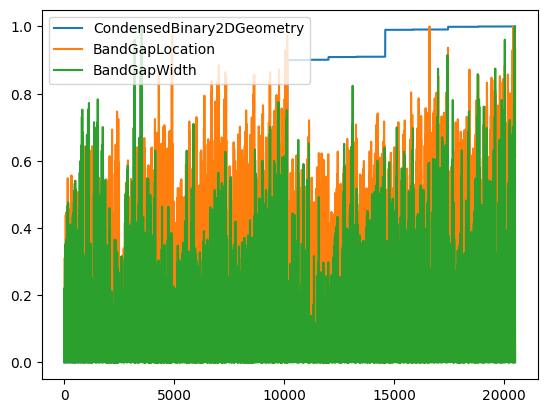

In [199]:
data.plot()

<Axes: >

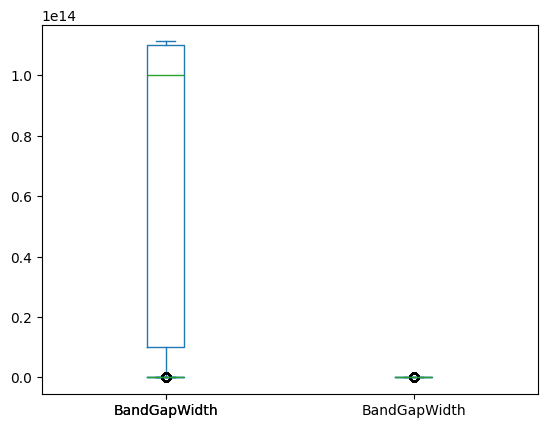

In [200]:
X.plot(kind="box")
y.plot(kind="box")

In [201]:
#data prepocessing


In [202]:
# MENGACAK DATA

X = X.sample(frac=1, random_state=42).reset_index(drop=True) #Mengacak data
y = y.sample(frac=1, random_state=42).reset_index(drop=True) #Mengacak data

In [203]:
pip install sklearn #type:ignore

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#type:ignore'

[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [204]:
import numpy as np

number_of_folds = 5
indices = np.arange(len(X))
np.random.shuffle(indices)

fold_split_index = []
number_per_fold = len(X) // number_of_folds

for i in range(number_of_folds):
    start_index = number_per_fold * i
    if i == number_of_folds - 1:  # Ensure the last fold captures the remaining data
        val_index = indices[start_index:]
    else:
        val_index = indices[start_index:start_index + number_per_fold]

    mask = ~np.isin(indices, val_index)
    train_index = indices[mask]

    fold_split_index.append((train_index, val_index))




In [205]:
for train_index,val_index in fold_split_index:
    print(f'val start index: {val_index.min()}')

val start index: 9
val start index: 1
val start index: 0
val start index: 2
val start index: 4


In [206]:
# Implementasi KNN dari dasar untuk regresi
class KNNRegressor:
    def __init__(self, k=5):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        return np.array([self.predict_one(x) for x in X])

    def predict_one(self, x):
        distances = np.linalg.norm(self.X_train - x, axis=1)
        k_indices = distances.argsort()[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        return np.mean(k_nearest_labels)



In [207]:
pip install sckitlearn #type: ignore

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sckitlearn (from versions: none)
ERROR: No matching distribution found for sckitlearn

[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [208]:
model = KNNRegressor()

def mean_squared_error(y_true, y_pred):
    return np.mean((np.array(y_true) - np.array(y_pred)) ** 2)


total_mse = 0
for i, (train_index, val_index) in enumerate(fold_split_index):
    X_train_fold = X.iloc[train_index].reset_index(drop=True)
    y_train_fold = y.iloc[train_index].reset_index(drop=True)
    X_val_fold = X.iloc[val_index].reset_index(drop=True)
    y_val_fold = y.iloc[val_index].reset_index(drop=True)
    
    model = KNNRegressor(k=5)
    model.fit(X_train_fold.values, y_train_fold.values)

    y_pred = model.predict(X_val_fold.values)

    mse = mean_squared_error(y_val_fold, y_pred)
    total_mse += mse

    print(f'MSE fold ke-{i + 1}: {mse}')

average_mse = total_mse / number_of_folds
print('\nRata-rata MSE:', average_mse)



    

MSE fold ke-1: 26675.26541602733
MSE fold ke-2: 25636.55831314603
MSE fold ke-3: 26207.61581736218
MSE fold ke-4: 26373.543983254203
MSE fold ke-5: 24895.631283749302

Rata-rata MSE: 25957.722962707812


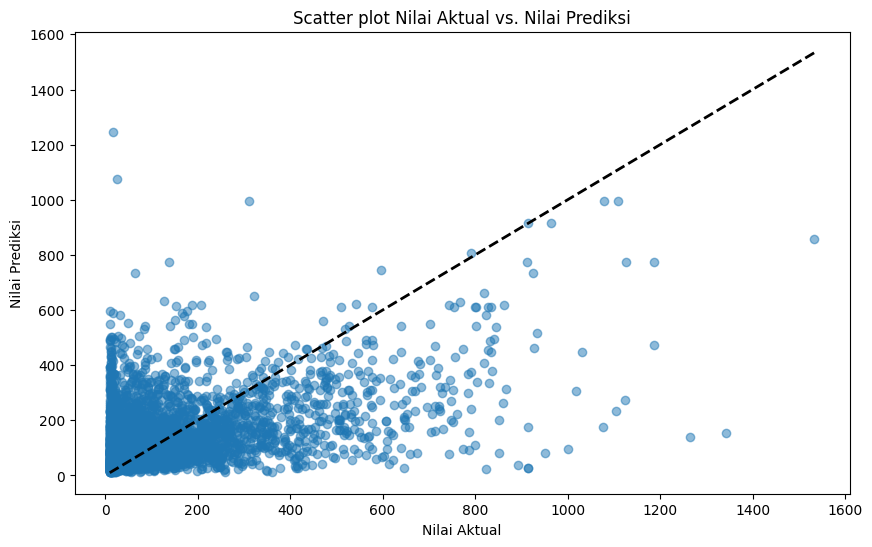

In [209]:
import matplotlib.pyplot as plt

def plot_scatter(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
    plt.xlabel('Nilai Aktual')
    plt.ylabel('Nilai Prediksi')
    plt.title('Scatter plot Nilai Aktual vs. Nilai Prediksi')
    plt.show()

# Menampilkan hasil dari fold terakhir sebagai contoh
y_test_fold = y.iloc[fold_split_index[-1][1]].reset_index(drop=True)
y_pred_fold = model.predict(X.iloc[fold_split_index[-1][1]].values)
plot_scatter(y_test_fold, y_pred_fold)
